# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# create the dataframe to hold city info
cities_df = pd.DataFrame({"City":cities})
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
count = 1

# create the lists to hold the data for each city
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []




for city in cities:    
        # setup url and make API request
        print(f"City log {count} of Set 1 | {city}.")
        count = count + 1
        
        target_url = ("http://api.openweathermap.org/data/2.5/weather?"
                      'appid={0}&q={1}').format(weather_api_key,city)
        try:
            # extract results
            response = requests.get(target_url).json()
            
            # add the city info to the lists             
            city_list.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
           
           
           
            
        except:
            print("City and associated data missing")

City log 1 of Set 1 | port-de-bouc.
City log 2 of Set 1 | kajaani.
City log 3 of Set 1 | busselton.
City log 4 of Set 1 | sentyabrskiy.
City and associated data missing
City log 5 of Set 1 | coihaique.
City log 6 of Set 1 | constitucion.
City log 7 of Set 1 | severo-kurilsk.
City log 8 of Set 1 | tabiauea.
City and associated data missing
City log 9 of Set 1 | hermanus.
City log 10 of Set 1 | bambous virieux.
City log 11 of Set 1 | clyde river.
City log 12 of Set 1 | hilo.
City log 13 of Set 1 | mataura.
City log 14 of Set 1 | toliary.
City and associated data missing
City log 15 of Set 1 | illoqqortoormiut.
City and associated data missing
City log 16 of Set 1 | buzmeyin.
City log 17 of Set 1 | taitung.
City log 18 of Set 1 | san andres.
City log 19 of Set 1 | haines junction.
City log 20 of Set 1 | svetlogorsk.
City log 21 of Set 1 | georgetown.
City log 22 of Set 1 | talnakh.
City log 23 of Set 1 | lake city.
City log 24 of Set 1 | taolanaro.
City and associated data missing
City lo

City log 220 of Set 1 | eyl.
City log 221 of Set 1 | port-gentil.
City log 222 of Set 1 | okahandja.
City log 223 of Set 1 | privolzhye.
City log 224 of Set 1 | aklavik.
City log 225 of Set 1 | otaru.
City log 226 of Set 1 | villa oliva.
City and associated data missing
City log 227 of Set 1 | rio gallegos.
City log 228 of Set 1 | iquique.
City log 229 of Set 1 | xining.
City log 230 of Set 1 | cayambe.
City log 231 of Set 1 | jalu.
City log 232 of Set 1 | takoradi.
City log 233 of Set 1 | flinders.
City log 234 of Set 1 | palmas.
City log 235 of Set 1 | amderma.
City and associated data missing
City log 236 of Set 1 | ha.
City and associated data missing
City log 237 of Set 1 | vao.
City log 238 of Set 1 | pisco.
City log 239 of Set 1 | paamiut.
City log 240 of Set 1 | barentsburg.
City and associated data missing
City log 241 of Set 1 | djougou.
City log 242 of Set 1 | souillac.
City log 243 of Set 1 | sumbawa.
City and associated data missing
City log 244 of Set 1 | vila velha.
City

City log 446 of Set 1 | garmsar.
City log 447 of Set 1 | urumqi.
City log 448 of Set 1 | kaeo.
City log 449 of Set 1 | bolitoc.
City log 450 of Set 1 | oranjestad.
City log 451 of Set 1 | mayari.
City and associated data missing
City log 452 of Set 1 | magadan.
City log 453 of Set 1 | yuanping.
City log 454 of Set 1 | fairbanks.
City log 455 of Set 1 | camocim.
City log 456 of Set 1 | dekar.
City log 457 of Set 1 | asau.
City log 458 of Set 1 | dunedin.
City log 459 of Set 1 | kavaratti.
City log 460 of Set 1 | arman.
City log 461 of Set 1 | mount abu.
City log 462 of Set 1 | palabuhanratu.
City and associated data missing
City log 463 of Set 1 | woodward.
City log 464 of Set 1 | kawerau.
City log 465 of Set 1 | macau.
City log 466 of Set 1 | leshukonskoye.
City log 467 of Set 1 | desaguadero.
City log 468 of Set 1 | anadyr.
City log 469 of Set 1 | bacolod.
City log 470 of Set 1 | tawkar.
City and associated data missing
City log 471 of Set 1 | lewistown.
City log 472 of Set 1 | hollan

In [8]:
#show count of cities with weather data
cities_df.count()

City          613
Lat           613
Lng           613
Max Temp      613
Humidity      613
Cloudiness    613
Wind Speed    613
Country       613
Date          613
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#save to csv file
cities_df.to_csv("cities.csv")

#specify the URL and request results in Celsius and Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
 
query_url = url + "appid" + weather_api_key + "&q=" + city


#Define temparature units for celsius and fahrenheit, metric and imperial respectively
celsius_url = url + "appid=" + weather_api_key + "&q=" + "&units=metric"
fahrenheit_url = url + "appid=" + weather_api_key + "&q=" + "&units=imperial"
max_temp = [(9/5)*(x - 273) + 32 for x in max_temp]



#Initialize data frame to store data from API calls                            
cities_df =pd.DataFrame({"City":city_list,
                         "Lat":lat,
                         "Lng":lng,
                         "Max Temp":max_temp,
                         "Humidity":humidity,
                         "Cloudiness":cloudiness,
                         "Wind Speed":wind_speed,
                         "Country":country,
                         "Date":date})
#round values in Max Temp col 
cities_df["Max Temp"].round(decimals=2)                           

#show cities Dataframe
cities_df.head(10)                    
                                               

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port-de-Bouc,43.40,4.98,50.270,93,20,2.10,FR,1604112999
1,Kajaani,64.23,27.73,26.870,92,90,1.00,FI,1604112999
2,Busselton,-33.65,115.33,69.476,66,100,4.25,AU,1604112999
3,Coyhaique,-45.58,-72.07,53.870,62,0,0.50,CL,1604113000
4,Constitución,-35.33,-72.42,57.794,70,0,3.22,CL,1604113000
5,Severo-Kuril'sk,50.68,156.12,40.640,92,100,17.55,RU,1604113000
6,Hermanus,-34.42,19.23,45.266,93,0,5.49,ZA,1604113000
7,Bambous Virieux,-20.34,57.76,69.278,54,0,3.13,MU,1604113000
8,Clyde River,70.47,-68.59,14.270,85,40,3.60,CA,1604112946
9,Hilo,19.73,-155.09,82.670,69,90,2.60,US,1604113000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#No City with a humidity > 100%

In [11]:
#  Get the indices of cities that have humidity over 100%.
#No City with a humidity > 100%

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#No City with a humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

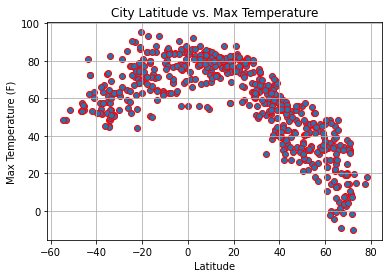

In [13]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature')
ax.scatter(cities_df['Lat'],cities_df['Max Temp'],edgecolors='red')
plt.grid()
fig.savefig('lat_vs_max_temp.png')

Analysis for the plot above:
The plot displays a latititude vs Max Temparature for selected cities.
The closer a city is to the 0 degrees latititude (Equator), the higher the max temparature.
Max temparature decreases as you drift further away from the equator and especially Northwards.

## Latitude vs. Humidity Plot

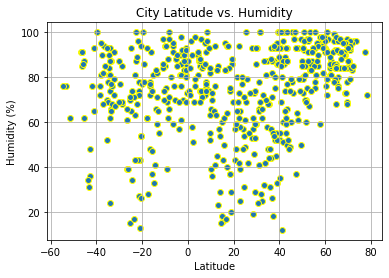

In [14]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity')
ax.scatter(cities_df['Lat'],cities_df['Humidity'],edgecolors='yellow')
plt.grid()
fig.savefig('lat_vs_humidity.png')

Analysis for the plot above:
The plot displays a latititude vs humidity for selected cities.
Cities below the equator have a higher average humidity percentage compared to the cities north of the equator which have a  generally well distributed average percentage.

## Latitude vs. Cloudiness Plot

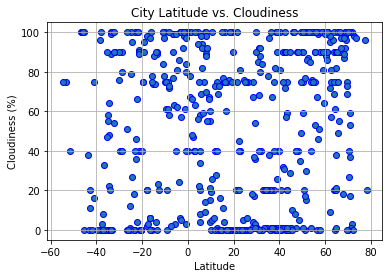

In [15]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness')
ax.scatter(cities_df['Lat'],cities_df['Cloudiness'],edgecolors='blue')
plt.grid()
fig.savefig('lat_vs_cloudiness.png')

Analysis for the plot above:
The plot displays a latititude vs Cloudiness for selected cities.
There is no significant difference in the cloudiness based on latitude.

## Latitude vs. Wind Speed Plot

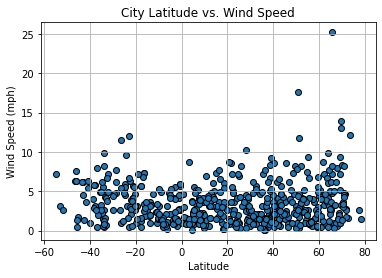

In [16]:
fig, ax = plt.subplots()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed')
ax.scatter(cities_df['Lat'],cities_df['Wind Speed'],edgecolors='black')
plt.grid()
fig.savefig('lat_vs_wind_speed.png')

Analysis for the plot above:
The plot displays a latititude vs humidity for selected cities.
The wind speed is at a low average 4-5 mph close to the equator both sides. However the speed increases slightly as you drift away fron the equator both sides.

## Linear Regression

In [17]:
#Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
cities_df_north = cities_df[cities_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
cities_df_south = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

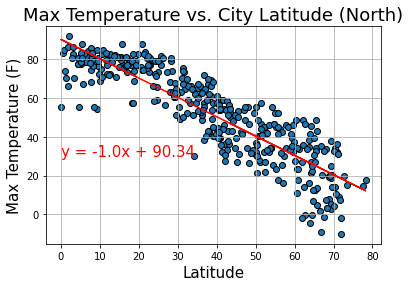

The r squared is: -0.8846492506611984


In [18]:
#setup linear regression and line equation
x_values = cities_df_north['Lat']
y_values = cities_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

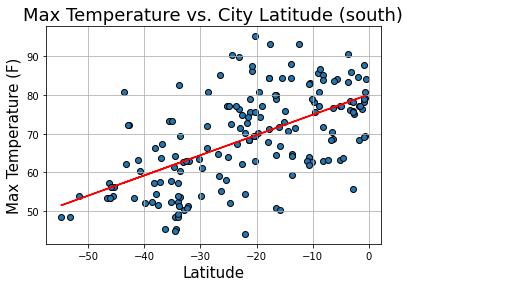

The r squared is: 0.5899736645925827


In [19]:
#setup linear regression and line equation
x_values = cities_df_south['Lat']
y_values = cities_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (south)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Analysis for the 2 plots above:
The 2 plots displays latitude in relationship with Max temparatures accross both Northern and southern hemispheres.
1.The linear regression lines indicate steeper drop in temparature as you drift further north from the equator.
2.Its clear that as you move away from the equator towards both sides of the hemisphere, there is a significant drop in     temparature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

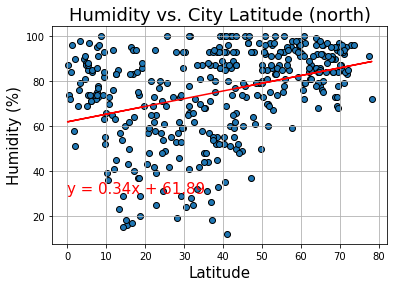

The r squared is: 0.3528374273296414


In [20]:
#setup linear regression and line equation
x_values = cities_df_north['Lat']
y_values = cities_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (north)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

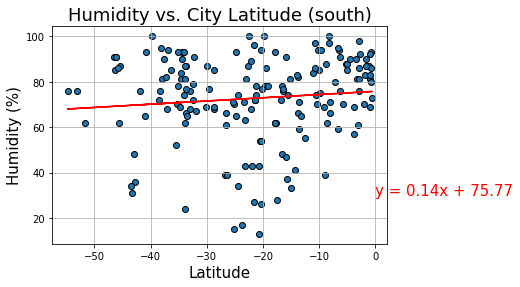

The r squared is: 0.10215761303921699


In [21]:
#setup linear regression and line equation
x_values = cities_df_south['Lat']
y_values = cities_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (south)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Analysis for the 2 plots above:
The 2 plots displays latitude in relationship with Humidity accross both Northern and Southern hemispheres.
1.Both hemispheres show very slight changes in Humidity as you move away from the equator.
2.The humidity has a low but constant increase Northwards and a low but constant decrease Southwards.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

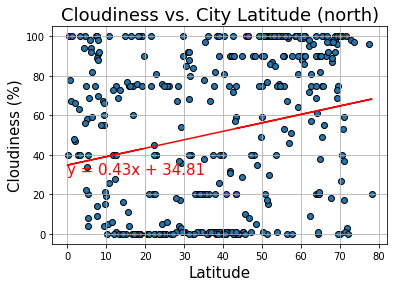

The r squared is: 0.2259072931438753


In [23]:
#setup linear regression and line equation
x_values = cities_df_north['Lat']
y_values = cities_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (north)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

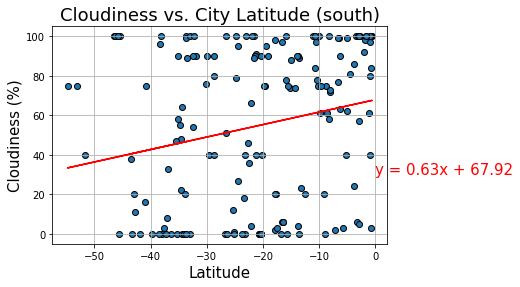

The r squared is: 0.2157775028222767


In [24]:
#setup linear regression and line equation
x_values = cities_df_south['Lat']
y_values = cities_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (south)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Analysis for the 2 plots above:
The 2 plots displays latitude in relationship with Cloudiness accross both Northern and Southern hemispheres.
1.Overall there is very little impact of latititude towards cloudiness.
2.However,the Northern hemispere shows a more cloudy situation in this analysis

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

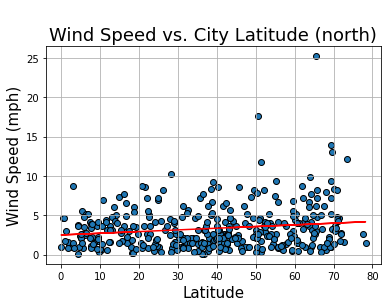

The r squared is: 0.16193875573379823


In [26]:
#setup linear regression and line equation
x_values = cities_df_north['Lat']
y_values = cities_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (north)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

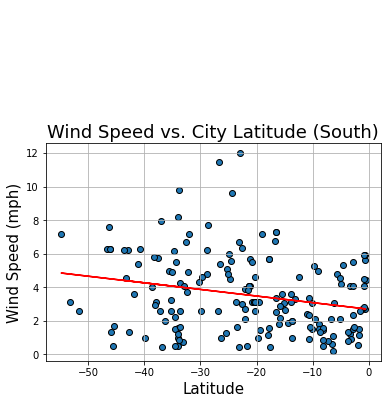

The r squared is: -0.23604455098747582


In [27]:
#setup linear regression and line equation
x_values = cities_df_south['Lat']
y_values = cities_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

Analysis for the 2 plots above:
The 2 plots displays latitude in relationship with Wind Speed accross both Northern and Southern hemispheres.
1.The average windspeed in the Northern Hemisphere is consistent at about 3-4mph. The Linear regression line shows a very slight rising slope.
2.On the other hand, the Southern hemisphere has an increased windspeed as shown by the linear regression line with very scattered higher speeds spread out. 